In [47]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [48]:
df = pd.read_csv("../data/datasets/miami/miami.csv")
df.head(5)

,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,h_angle,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,wind_dir,wind_gust_spd,wind_spd,weather_description
0,23.5,252.3,100,2014-01-01:00,18.1,0,0,-17.5,0,NaN,...,23.2,2013-12-31T19:00:00,2014-01-01T00:00:00,1388534400,0.0,NaN,60,9.3,7.20,Overcast clouds
1,23.6,257.3,98,2014-01-01:01,17.8,0,0,-30.5,0,NaN,...,23.4,2013-12-31T20:00:00,2014-01-01T01:00:00,1388538000,0.0,NaN,50,9.3,5.70,Overcast clouds
2,23.9,262.0,100,2014-01-01:02,18.0,0,0,-43.8,0,NaN,...,23.6,2013-12-31T21:00:00,2014-01-01T02:00:00,1388541600,0.0,NaN,60,8.2,5.70,Overcast clouds
3,23.7,266.9,100,2014-01-01:03,18.5,0,0,-57.3,0,NaN,...,23.4,2013-12-31T22:00:00,2014-01-01T03:00:00,1388545200,0.0,NaN,50,8.8,5.09,Overcast clouds
4,23.9,273.6,100,2014-01-01:04,18.7,0,0,-70.8,0,NaN,...,23.6,2013-12-31T23:00:00,2014-01-01T04:00:00,1388548800,0.0,NaN,60,9.3,6.20,Overcast clouds


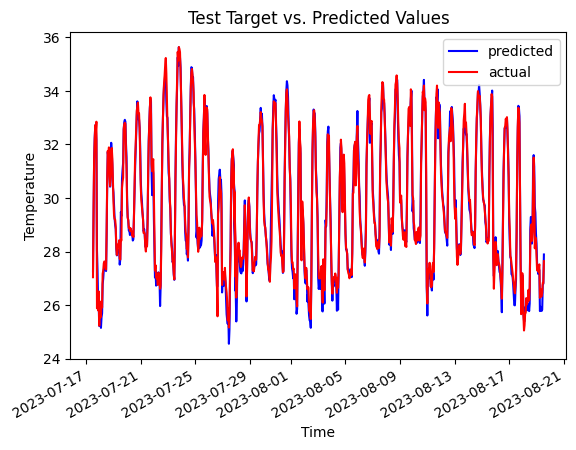

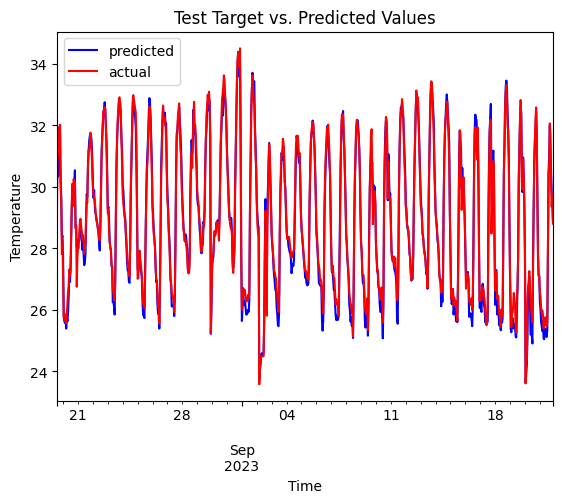

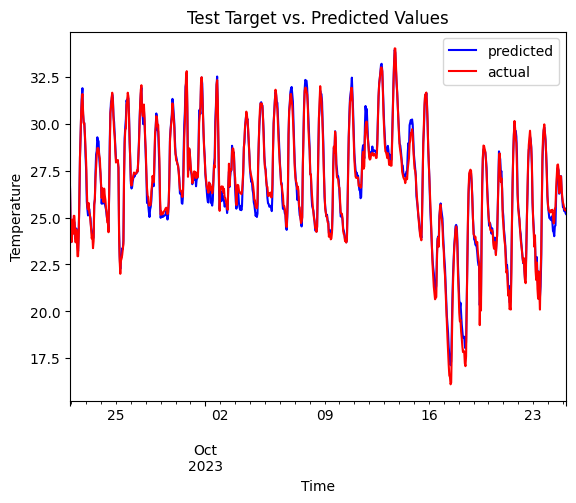

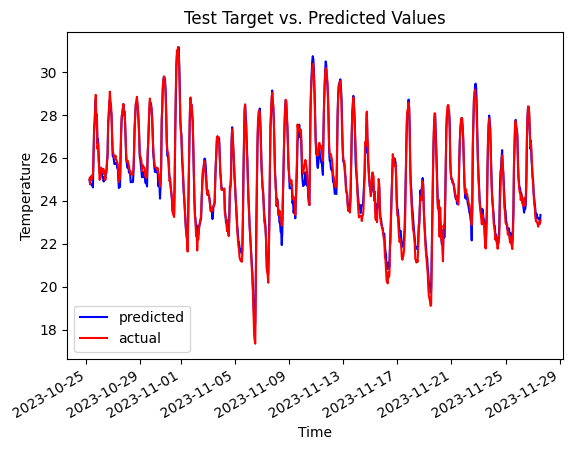

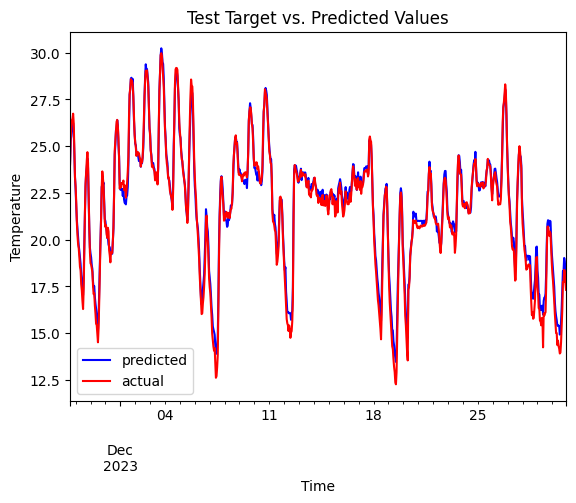

Average MSE: 0.1253335602439124


In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from math import floor


X = df[['feels_like', 'pressure', 'humidity', 'temp_min',	'temp_max', 'wind_speed']]
y = df['temp']

X.count()
cld = linear_model.ARDRegression()

scores = []
tscv = TimeSeriesSplit(test_size=800)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    cld.fit(X_train, y_train)

    y_pred = cld.predict(X_test)
    predictions = pd.DataFrame({"index": df.iloc[test_index].index,"actual": y.iloc[test_index], "predicted": y_pred})
    predictions.plot(x="index", y=['predicted', 'actual'], style=['b-', 'r-'])
    plt.title('Test Target vs. Predicted Values')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.show()
    
    scores.append(mean_squared_error(y_test, y_pred))

avg_mse = np.mean(scores)
print("Average MSE:", avg_mse)



In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from math import floor

# df = df.reset_index(names="timestamp")
X = pd.DataFrame({"year": df["timestamp"].dt.year, 
                  "month": df["timestamp"].dt.month, 
                  "day": df["timestamp"].dt.day,
                   "hour": df["timestamp"].dt.hour
                   "temp": df["temp"],
                   "feels_like": df["feels_like"],
                    "pressure": df["pressure"],
                    "humidity": df[]	temp_min	temp_max	wind_speed	wind_deg	clouds_coverage})
y = df['temp']
search_params = {
    'alpha_1':[0.01, 0.1, 1.0],
    'alpha_2': [0.01, 0.1, 1.0],
    'lambda_1': [0.01, 0.1, 1.0],
    'n_iter': [100, 200, 300]
}


cld = linear_model.ARDRegression()

scores = []
tscv = TimeSeriesSplit(test_size=800)

gs = GridSearchCV(cld, param_grid=search_params ,cv=tscv, scoring='neg_mean_squared_error')
gs.fit(X, y)
print("Best estimator", gs.best_estimator_)
print("Best params", gs.best_params_)
print("Best score", gs.best_score_)

# scores = []
# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     cld.fit(X_train, y_train)

#     y_pred = cld.predict(X_test)
#     predictions = pd.DataFrame({"index": df.iloc[test_index]["timestamp"],"actual": y.iloc[test_index], "predicted": y_pred})
#     predictions.plot(x="index", y=['predicted', 'actual'], style=['b-', 'r-'])
#     plt.title('Test Target vs. Predicted Values')
#     plt.xlabel('Time')
#     plt.ylabel('Temperature')
#     plt.show()
    
#     scores.append(mean_squared_error(y_test, y_pred))

# avg_mse = np.mean(scores)
# print("Average MSE:", avg_mse)



SyntaxError: invalid syntax. Perhaps you forgot a comma? (4095260464.py, line 10)

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from math import floor

# df = df.reset_index(names="timestamp")
X = pd.DataFrame({"year": df["timestamp"].dt.year, 
                  "month": df["timestamp"].dt.month, 
                  "day": df["timestamp"].dt.day,
                   "hour": df["timestamp"].dt.hour})
y = df['wind_speed']

search_params = {
    'alpha_1':[0.01, 0.1, 1.0],
    'alpha_2': [0.01, 0.1, 1.0],
    'lambda_1': [0.01, 0.1, 1.0],
    'n_iter': [100, 200, 300]
}


cld = linear_model.ARDRegression()

scores = []
tscv = TimeSeriesSplit(test_size=800)

gs = GridSearchCV(cld, param_grid=search_params ,cv=tscv, scoring='neg_mean_squared_error')
gs.fit(X, y)
print("Best estimator", gs.best_estimator_)
print("Best params", gs.best_params_)
print("Best score", gs.best_score_)

# for train_index, test_index in tscv.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     cld.fit(X_train, y_train)

#     y_pred = cld.predict(X_test)
#     predictions = pd.DataFrame({"index": df.iloc[test_index]["timestamp"],"actual": y.iloc[test_index], "predicted": y_pred})
#     predictions.plot(x="index", y=['predicted', 'actual'], style=['b-', 'r-'])
#     plt.title('Test Target vs. Predicted Values')
#     plt.xlabel('Time')
#     plt.ylabel('Temperature')
#     plt.show()
    
#     scores.append(mean_squared_error(y_test, y_pred))

# avg_mse = np.mean(scores)
# print("Average MSE:", avg_mse)



/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: Futu

Best estimator ARDRegression(alpha_1=0.01, alpha_2=1.0, lambda_1=1.0, n_iter=100)
Best params {'alpha_1': 0.01, 'alpha_2': 1.0, 'lambda_1': 1.0, 'n_iter': 100}
Best score -58.262390541111


/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/sklearn/linear_model/_bayes.py:53: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


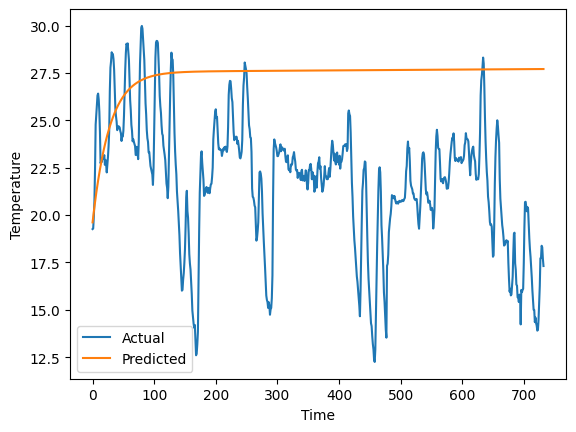

In [45]:
from statsmodels.tsa.vector_ar.var_model import VAR
from time import mktime


X = pd.DataFrame({ "timestamp": df["timestamp"],
                   "temp": df["temp"]})
X = X[["timestamp",
                   "temp"
                   ]].to_numpy()

train_size = int(0.9 * len(X))
train, test = X[:train_size], X[train_size:]

model = VAR(train)
var_results = model.fit()
forecast = var_results.forecast(train, steps=len(test))

real_temp = test[:, 1]
forecast_temp = forecast[:, 1]


 
plt.plot(real_temp, label="Actual")
plt.plot(forecast_temp, label="Predicted")
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np

2024-03-09 13:38:41.748755: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-09 13:38:41.816607: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-09 13:38:42.172144: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 13:38:42.172318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 13:38:42.231929: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
df = pd.read_csv("../data/datasets/miami/miami.csv")
df.rename(columns={"ts": "timestamp"}, inplace=True)
df.rename(columns={"app_temp": "feels_like",
                 "clouds": "clouds_percentage", "elev_angle": "sun_horison_angle",
                 "precip": "precipitation", "pres": "pressure",
                 "rh": "humidity", "snow": "snow_level",
                 "vis": "visibility", "wind_spd": "wind_speed",
                 "wind_dir": "wind_direction"}, inplace=True)
df = df[['timestamp', 'temp', 'feels_like', 'clouds_percentage', 'sun_horison_angle',
         'precipitation', 'pressure', 'humidity', 'snow_level', 'visibility',
         'wind_speed', 'wind_direction', 'weather_description']]
df.index = pd.to_datetime(df["timestamp"], unit="s")
df.head

<bound method NDFrame.head of                       timestamp  temp  feels_like  clouds_percentage  \
timestamp                                                              
2014-01-01 00:00:00  1388534400  23.2        23.5                100   
2014-01-01 01:00:00  1388538000  23.4        23.6                 98   
2014-01-01 02:00:00  1388541600  23.6        23.9                100   
2014-01-01 03:00:00  1388545200  23.4        23.7                100   
2014-01-01 04:00:00  1388548800  23.6        23.9                100   
...                         ...   ...         ...                ...   
2024-03-06 19:00:00  1709751600  25.0        25.4                 94   
2024-03-06 20:00:00  1709755200  25.0        25.4                 96   
2024-03-06 21:00:00  1709758800  23.3        23.8                 97   
2024-03-06 22:00:00  1709762400  23.3        23.3                 83   
2024-03-06 23:00:00  1709766000  23.3        23.4                 83   

                     sun_horison_

In [3]:
df.drop(columns=['weather_description'], inplace=True)

In [4]:
min_timestamp = df['timestamp'].min()
df['from_0_ts'] = df['timestamp'] - min_timestamp


In [5]:
num_s_day = 60*60*24
num_s_year = 365.2425* num_s_day
df["day_sin"] = np.sin(df['from_0_ts'] * (2 * np.pi / num_s_day))
df["day_cos"] = np.cos(df['from_0_ts'] * (2 * np.pi / num_s_day))

df["year_sin"] = np.sin(df['from_0_ts'] * (2 * np.pi / num_s_year))
df["year_cos"] = np.cos(df['from_0_ts'] * (2 * np.pi / num_s_year))

In [6]:

df.drop(columns=['from_0_ts', 'timestamp'], inplace=True)
df.head(5)

,temp,feels_like,clouds_percentage,sun_horison_angle,precipitation,pressure,humidity,snow_level,visibility,wind_speed,wind_direction,day_sin,day_cos,year_sin,year_cos
timestamp,,,,,,,,,,,,,,,
2014-01-01 00:00:00,23.2,23.5,100,-17.5,0.0,1021,73,0,NaN,7.20,60,0.000000,1.000000,0.000000,1.000000
2014-01-01 01:00:00,23.4,23.6,98,-30.5,0.0,1021,71,0,NaN,5.70,50,0.258819,0.965926,0.000717,1.000000
2014-01-01 02:00:00,23.6,23.9,100,-43.8,0.0,1022,71,0,NaN,5.70,60,0.500000,0.866025,0.001434,0.999999
2014-01-01 03:00:00,23.4,23.7,100,-57.3,0.0,1022,74,0,NaN,5.09,50,0.707107,0.707107,0.002150,0.999998
2014-01-01 04:00:00,23.6,23.9,100,-70.8,0.0,1022,74,0,NaN,6.20,60,0.866025,0.500000,0.002867,0.999996


Snow level in current Miami dataset is 0 in all rows so for now drop for compability

In [7]:
df.drop(columns=['snow_level'], inplace=True)

In [8]:
df.isna().sum()
df.drop(columns=['visibility'], inplace=True)

In [9]:
df.columns

Index(['temp', 'feels_like', 'clouds_percentage', 'sun_horison_angle',
       'precipitation', 'pressure', 'humidity', 'wind_speed', 'wind_direction',
       'day_sin', 'day_cos', 'year_sin', 'year_cos'],
      dtype='object')

In [10]:

def df_to_X_y(df, target_start, target_end,
              x_start, x_end,
               window_size=6): 
    np_df = df.to_numpy()
    X = []
    y = []
    c=0
    for i in range(len(np_df) - window_size):
        row = [r[x_start:x_end] for r in np_df[i:i+window_size]]
        X.append(row)
        label = np_df[i+window_size][target_start:target_end]

        y.append(label)

    return np.array(X), np.array(y)


In [11]:
X, y = df_to_X_y(df=df, target_start=0, target_end=9,
                 x_start=9, x_end=13)
X.shape, y.shape

((91458, 6, 4), (91458, 9))

In [12]:
X_t = pd.DataFrame(y)
X_t

,0,1,2,3,4,5,6,7,8
0,24.0,24.5,98.0,-81.3,0.000000,1020.0,80.0,8.80,80.0
1,24.2,24.8,98.0,-68.0,0.000000,1020.0,80.0,7.20,90.0
2,24.2,24.8,99.0,-54.5,0.000000,1019.0,82.0,8.19,90.0
3,24.2,24.8,100.0,-41.0,0.000000,1019.0,83.0,7.20,90.0
4,24.2,24.8,97.0,-27.8,0.000000,1019.0,83.0,8.19,90.0
...,...,...,...,...,...,...,...,...,...
91453,25.0,25.4,94.0,52.3,0.000000,1003.0,69.0,3.58,179.0
91454,25.0,25.4,96.0,42.5,8.000000,1002.0,69.0,4.47,174.0
91455,23.3,23.8,97.0,30.8,52.189999,1002.0,78.0,4.92,236.0
91456,23.3,23.3,83.0,18.0,0.000000,1001.0,61.0,2.68,175.0


In [13]:
X_train, y_train = X[:-12000], y[:-12000]
X_val, y_val = X[-12000:-6500], y[-12000:-6500]
X_test, y_test = X[-6500:], y[-6500:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((79458, 6, 4), (79458, 9), (5500, 6, 4), (5500, 9))

In [14]:
temp_train_mean = np.mean(y_train[:, 0])
temp_train_std = np.std(y_train[:, 0])

feels_like_train_mean = np.mean(y_train[:, 1])
feels_like_train_std = np.std(y_train[:, 1])

clouds_percentage_train_mean = np.mean(y_train[:, 2])
clouds_percentage_train_std = np.std(y_train[:, 2])

sun_horison_angle_train_mean = np.mean(y_train[:, 3])
sun_horison_angle_train_std = np.std(y_train[:, 3])

precipitation_train_mean = np.mean(y_train[:, 4])
precipitation_train_std = np.std(y_train[:, 4])

pressure_train_mean = np.mean(y_train[:, 5])
pressure_train_std = np.std(y_train[:, 5])

humidity_train_mean = np.mean(y_train[:, 6])
humidity_train_std = np.std(y_train[:, 6])

wind_speed_train_mean = np.mean(y_train[:, 7])
wind_speed_train_std = np.std(y_train[:, 7])

wind_direction_train_mean = np.mean(y_train[:, 8])
wind_direction_train_std = np.std(y_train[:, 8])



In [15]:
# def preprocess_x(X):
#     X[:, :, 0] = (X[ :, :, 0] - temp_train_mean) / temp_train_std
#     X[:, :, 1] = (X[ :, :, 1] - feels_like_train_mean) / feels_like_train_std
#     X[:, :, 2] = (X[ :, :, 2] - clouds_percentage_train_mean) / clouds_percentage_train_std
#     X[:, :, 3] = (X[ :, :, 3] - sun_horison_angle_train_mean) / sun_horison_angle_train_std
#     X[:, :, 4] = (X[ :, :, 4] - precipitation_train_mean) / precipitation_train_std
#     X[:, :, 5] = (X[ :, :, 5] - pressure_train_mean) / pressure_train_std
#     X[:, :, 6] = (X[ :, :, 6] - humidity_train_mean) / humidity_train_std
#     X[:, :, 7] = (X[ :, :, 7] - wind_speed_train_mean) / wind_speed_train_std
#     X[:, :, 8] = (X[ :, :, 8] - wind_direction_train_mean) / wind_direction_train_std
#     return X

# preprocess_x(X_train)
# preprocess_x(X_val)
# preprocess_x(X_test)

In [16]:
def preprocess_y(y):
    y[:, 0] = (y[:, 0] - temp_train_mean) / temp_train_std
    y[:, 1] = (y[:, 1] - feels_like_train_mean) / feels_like_train_std
    y[:, 2] = (y[:, 2] - clouds_percentage_train_mean) / clouds_percentage_train_std
    y[:, 3] = (y[:, 3] - sun_horison_angle_train_mean) / sun_horison_angle_train_std
    y[:, 4] = (y[:, 4] - precipitation_train_mean) / precipitation_train_std
    y[:, 5] = (y[:, 5] - pressure_train_mean) / pressure_train_std
    y[:, 6] = (y[:, 6] - humidity_train_mean) / humidity_train_std
    y[:, 7] = (y[:, 7] - wind_speed_train_mean) / wind_speed_train_std
    y[:, 8] = (y[:, 8] - wind_direction_train_mean) / wind_direction_train_std
    
    return y

preprocess_y(y_train)
preprocess_y(y_val)
preprocess_y(y_test)

array([[ 0.54467941,  0.57589853, -1.58024016, ...,  0.63429393,
        -0.43711716,  0.88333823],
       [ 0.51673987,  0.57589853, -1.38092287, ...,  0.82397838,
        -0.18970321,  0.88333823],
       [ 0.37704214,  0.36791773, -1.58024016, ...,  0.82397838,
        -0.18970321,  0.98880382],
       ...,
       [-0.62878145, -0.68931801,  1.18172812, ...,  0.25492503,
         0.46346962,  0.94661759],
       [-0.62878145, -0.77597668,  0.78309352, ..., -1.35739278,
        -0.64494488,  0.30327748],
       [-0.62878145, -0.75864495,  0.78309352, ..., -0.97802388,
        -1.20904869,  1.26301436]])

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((6, 4)))
model1.add(LSTM(32, return_sequences=True))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(9, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 6, 32)             4736      
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 9)                 81        
                                                                 
Total params: 30169 (117.85 KB)
Trainable params: 30169 (117.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
cp1 = ModelCheckpoint('weather/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [27]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=8, callbacks=[cp1])

Epoch 1/8
2482/2484 [============================>.] - ETA: 0s - loss: 0.7658 - root_mean_squared_error: 0.8751INFO:tensorflow:Assets written to: weather/assets


INFO:tensorflow:Assets written to: weather/assets


2484/2484 [==============================] - 48s 17ms/step - loss: 0.7658 - root_mean_squared_error: 0.8751 - val_loss: 1.0456 - val_root_mean_squared_error: 1.0226
Epoch 2/8
2483/2484 [============================>.] - ETA: 0s - loss: 0.6731 - root_mean_squared_error: 0.8205INFO:tensorflow:Assets written to: weather/assets


INFO:tensorflow:Assets written to: weather/assets


2484/2484 [==============================] - 51s 20ms/step - loss: 0.6732 - root_mean_squared_error: 0.8205 - val_loss: 1.0101 - val_root_mean_squared_error: 1.0051
Epoch 3/8
2482/2484 [============================>.] - ETA: 0s - loss: 0.6620 - root_mean_squared_error: 0.8137INFO:tensorflow:Assets written to: weather/assets


INFO:tensorflow:Assets written to: weather/assets


2484/2484 [==============================] - 46s 19ms/step - loss: 0.6620 - root_mean_squared_error: 0.8136 - val_loss: 1.0001 - val_root_mean_squared_error: 1.0001
Epoch 4/8
2483/2484 [============================>.] - ETA: 0s - loss: 0.6578 - root_mean_squared_error: 0.8111INFO:tensorflow:Assets written to: weather/assets


INFO:tensorflow:Assets written to: weather/assets


2484/2484 [==============================] - 43s 17ms/step - loss: 0.6578 - root_mean_squared_error: 0.8111 - val_loss: 0.9972 - val_root_mean_squared_error: 0.9986
Epoch 5/8
2481/2484 [============================>.] - ETA: 0s - loss: 0.6562 - root_mean_squared_error: 0.8101INFO:tensorflow:Assets written to: weather/assets


INFO:tensorflow:Assets written to: weather/assets


2484/2484 [==============================] - 43s 17ms/step - loss: 0.6562 - root_mean_squared_error: 0.8101 - val_loss: 0.9967 - val_root_mean_squared_error: 0.9983
Epoch 6/8
2483/2484 [============================>.] - ETA: 0s - loss: 0.6553 - root_mean_squared_error: 0.8095INFO:tensorflow:Assets written to: weather/assets


INFO:tensorflow:Assets written to: weather/assets


2484/2484 [==============================] - 43s 17ms/step - loss: 0.6553 - root_mean_squared_error: 0.8095 - val_loss: 0.9922 - val_root_mean_squared_error: 0.9961
Epoch 7/8
2484/2484 [==============================] - 37s 15ms/step - loss: 0.6546 - root_mean_squared_error: 0.8091 - val_loss: 0.9974 - val_root_mean_squared_error: 0.9987
Epoch 8/8
2482/2484 [============================>.] - ETA: 0s - loss: 0.6543 - root_mean_squared_error: 0.8089INFO:tensorflow:Assets written to: weather/assets


INFO:tensorflow:Assets written to: weather/assets


2484/2484 [==============================] - 45s 18ms/step - loss: 0.6542 - root_mean_squared_error: 0.8088 - val_loss: 0.9919 - val_root_mean_squared_error: 0.9959


In [28]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
weather_model = load_model('weather/')

In [29]:
def get_predictions(model, X, start=None, end=None):
  predictions = model.predict(X)
  if start and end:
    return predictions[start:end]
  return predictions

In [30]:
predictions = get_predictions(weather_model, X_train)


2484/2484 [==============================] - 22s 8ms/step


In [40]:
def plot_predictions(predictions, y, atr_index, atr_name, start, end):
    param_forecast = predictions[:, atr_index]
    actual_data = y[:, atr_index]
    
    actual_label = f"Actual {atr_name}"
    prediction_label = f"Predicted {atr_name}"

    df = pd.DataFrame(data={actual_label: actual_data, 
                      prediction_label: param_forecast})
    df.index = df.index + min_timestamp + (df.index - 1) * 3600
    df.index = pd.to_datetime(df.index, unit="s")
    plt.plot(df[actual_label][start:end])
    plt.plot(df[prediction_label][start:end])
    return df


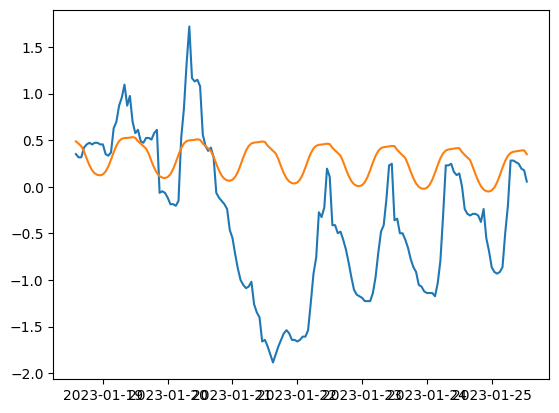

In [43]:
foracast = plot_predictions(predictions=predictions,
                            y=y_train, atr_index=1,
                            atr_name='Feels Like', start=-169, end=-1)

In [44]:
foracast.head(5)

,Actual Feels Like,Predicted Feels Like
2013-12-31 23:00:00,-0.567996,-1.190804
2014-01-01 00:00:01,-0.516001,-1.220177
2014-01-01 01:00:02,-0.516001,-1.232356
2014-01-01 02:00:03,-0.516001,-1.224923
2014-01-01 03:00:04,-0.516001,-1.200303


In [1]:
import xgboost as xgb
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [10]:


from sklearn.model_selection import TimeSeriesSplit


In [12]:
temp = df[["temp","day_sin", "day_cos", "year_sin", "year_cos"]]

In [13]:


def add_lags(df, target):
    target_map = df[target].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    df['lag4'] = (df.index - pd.Timedelta('1456 days')).map(target_map)

    return df



In [17]:
temp = add_lags(temp, 'temp')

In [49]:
from sklearn.metrics import mean_squared_error as mse
tss = TimeSeriesSplit(n_splits=5, test_size=365*1)
temp = temp.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(temp):
    train = temp.iloc[train_idx]
    test = temp.iloc[val_idx]



    FEATURES = ["day_sin", "day_cos", "year_sin", "year_cos",
                'lag1','lag2','lag3', 'lag4']
    TARGET = 'temp'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mse(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:25.11350	validation_1-rmse:20.19588


/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:27:18] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:9.43399	validation_1-rmse:6.74032
[200]	validation_0-rmse:4.00843	validation_1-rmse:2.73126
[288]	validation_0-rmse:2.55736	validation_1-rmse:2.67544


/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:27:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:25.09556	validation_1-rmse:21.85061
[100]	validation_0-rmse:9.42858	validation_1-rmse:8.70722
[200]	validation_0-rmse:4.00863	validation_1-rmse:4.43931
[300]	validation_0-rmse:2.47463	validation_1-rmse:3.10315
[400]	validation_0-rmse:2.16508	validation_1-rmse:2.75681
[500]	validation_0-rmse:2.10453	validation_1-rmse:2.67123
[600]	validation_0-rmse:2.08194	validation_1-rmse:2.63062
[700]	validation_0-rmse:2.06664	validation_1-rmse:2.61828
[767]	validation_0-rmse:2.05706	validation_1-rmse:2.61940
[0]	validation_0-rmse:25.08329	validation_1-rmse:20.60237


/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:28:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:9.42458	validation_1-rmse:7.63158
[200]	validation_0-rmse:4.00885	validation_1-rmse:4.02483
[300]	validation_0-rmse:2.47687	validation_1-rmse:3.37197
[400]	validation_0-rmse:2.16879	validation_1-rmse:3.32666
[418]	validation_0-rmse:2.15028	validation_1-rmse:3.32850
[0]	validation_0-rmse:25.06692	validation_1-rmse:20.49174


/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:28:17] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:9.41962	validation_1-rmse:7.17991
[200]	validation_0-rmse:4.01017	validation_1-rmse:3.26499
[300]	validation_0-rmse:2.48035	validation_1-rmse:2.94770
[319]	validation_0-rmse:2.37652	validation_1-rmse:2.98755
[0]	validation_0-rmse:25.05030	validation_1-rmse:21.42395


/home/soloclimb/projects/Weather_Predictor/virt/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:28:28] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:9.41452	validation_1-rmse:7.66134
[200]	validation_0-rmse:4.01111	validation_1-rmse:3.09205
[300]	validation_0-rmse:2.48573	validation_1-rmse:2.46299
[339]	validation_0-rmse:2.30446	validation_1-rmse:2.51127


In [41]:
results = pd.DataFrame(columns={"Actual": y_test, "Predicted": y_pred})

In [50]:
y_test = pd.DataFrame(y_test, columns=['temp'])

In [51]:
y_test.head()

,temp
timestamp,
2024-02-20 19:00:00,21.0
2024-02-20 20:00:00,21.2
2024-02-20 21:00:00,21.8
2024-02-20 22:00:00,21.6
2024-02-20 23:00:00,19.8


In [52]:
y_test["Predicted Temp"] = y_pred;

In [53]:
y_test.rename(columns={"temp": "Actual Temp"}, inplace=True)

<Axes: xlabel='timestamp'>

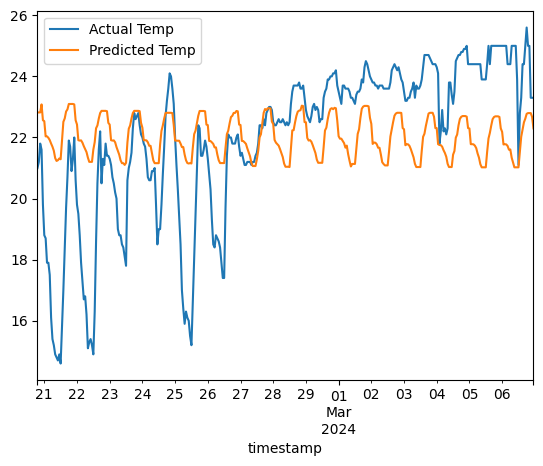

In [54]:
y_test.plot()